# 📊 Análise Exploratória de Dados Socioeconômicos dos Bairros de Natal/RN  
## Um Estudo de Caso

**Autor:** Ignacio Sánchez Gendriz  
**Versão:** 1.0  
**Data:** Abril de 2025  
**Linguagem:** Python 3.12.4  
**Bibliotecas utilizadas:** `numpy`, `pandas`, `matplotlib`

---

### 📝 Resumo

**Contextualização:**  
A Análise Exploratória de Dados (AED) é uma etapa fundamental na *Ciência de Dados*, com aplicações em diversas áreas do conhecimento.

**Objetivos:**  
Neste estudo, são analisados dados socioeconômicos dos 36 bairros da cidade de Natal/RN, organizados em quatro regiões administrativas: Norte, Sul, Leste e Oeste.

**Materiais e Métodos:**  
Os dados utilizados foram extraídos do IBGE[1]. A análise baseia-se em visualizações com gráficos de barras e dispersão, além do uso de técnicas simples de separação linear.  
A linguagem Python 3.12.4 foi utilizada juntamente com as bibliotecas `numpy`, `pandas` e `matplotlib`.

**Resultados:**  
As análises revelaram diferenças marcantes entre os bairros das distintas regiões. As regiões **Norte** e **Oeste** apresentaram, em geral, bairros mais populosos e com menor renda média, em contraste com as regiões **Leste** e **Sul**, que concentram bairros menos populosos e com maior renda per capita.

**Conclusão:**  
O estudo demonstra como técnicas de *Ciência de Dados* podem ser empregadas para extrair informações relevantes de bases públicas, evidenciando seu papel no apoio à tomada de decisões informadas.

---

[1]: *Os dados apresentados neste trabalho têm caráter exclusivamente didático e foram obtidos por meio da agregação de setores censitários, sem validação por especialistas da área.*



In [1]:
# === Bibliotecas principais utilizadas neste estudo ===

import numpy as np      # Operações numéricas e vetoriais eficientes
import pandas as pd     # Manipulação e análise de dados em formato tabular (DataFrames)
import matplotlib.pyplot as plt  # Criação de gráficos e visualizações

import os               # Utilitários do sistema operacional (uso de diretórios e arquivos)


In [2]:
# === Carregamento e pré-processamento inicial dos dados ===

# Carrega o dataset contendo informações socioeconômicas dos bairros de Natal/RN diretamente do GitHub
df_natal = pd.read_csv('https://raw.githubusercontent.com/igendriz/DCA3501-Ciencia-Dados/main/Dataset/Bairros_Natal_v01.csv')

# Remove linhas com quaisquer valores ausentes (NaN)
df_natal = df_natal.dropna()

# Corrige nomes específicos de bairros para padronização (sem acentos ou espaços)
df_natal.loc[0, "bairro"] = 'ns_apresentacao'   # Nossa Senhora da Apresentação
df_natal.loc[34, "bairro"] = 'ns_nazare'        # Nossa Senhora de Nazaré
df_natal.loc[32, "bairro"] = 'c_esperanca'      # Cidade da Esperança

# Remove a coluna 'Unnamed: 0', gerada automaticamente pelo salvamento anterior do CSV
df_natal = df_natal.drop(columns='Unnamed: 0')

# Visualiza parte do DataFrame para conferência
df_natal.iloc[3:10, :]


,regiao,bairro,x,y,renda_mensal_total,populacao,renda_mensal_pessoa,rendimento_nominal_medio
3,norte,pajucara,252992.3055,9366001.514,22788000.0,58021.0,392.75,0.92
4,norte,potengi,250958.9713,9363206.506,31906000.0,57848.0,551.55,1.23
5,norte,redinha,254326.0817,9364517.623,5836400.0,16630.0,350.96,0.84
6,norte,salinas,252813.0049,9360891.140,220280.0,1177.0,187.15,0.46
7,sul,candelaria,254613.8318,9353363.923,45274900.0,22391.0,2022.01,4.35
8,sul,capim_macio,256370.2043,9352679.360,50300700.0,22760.0,2210.05,4.71
9,sul,lagoa_nova,255560.4708,9355067.474,80541300.0,37518.0,2146.74,4.01


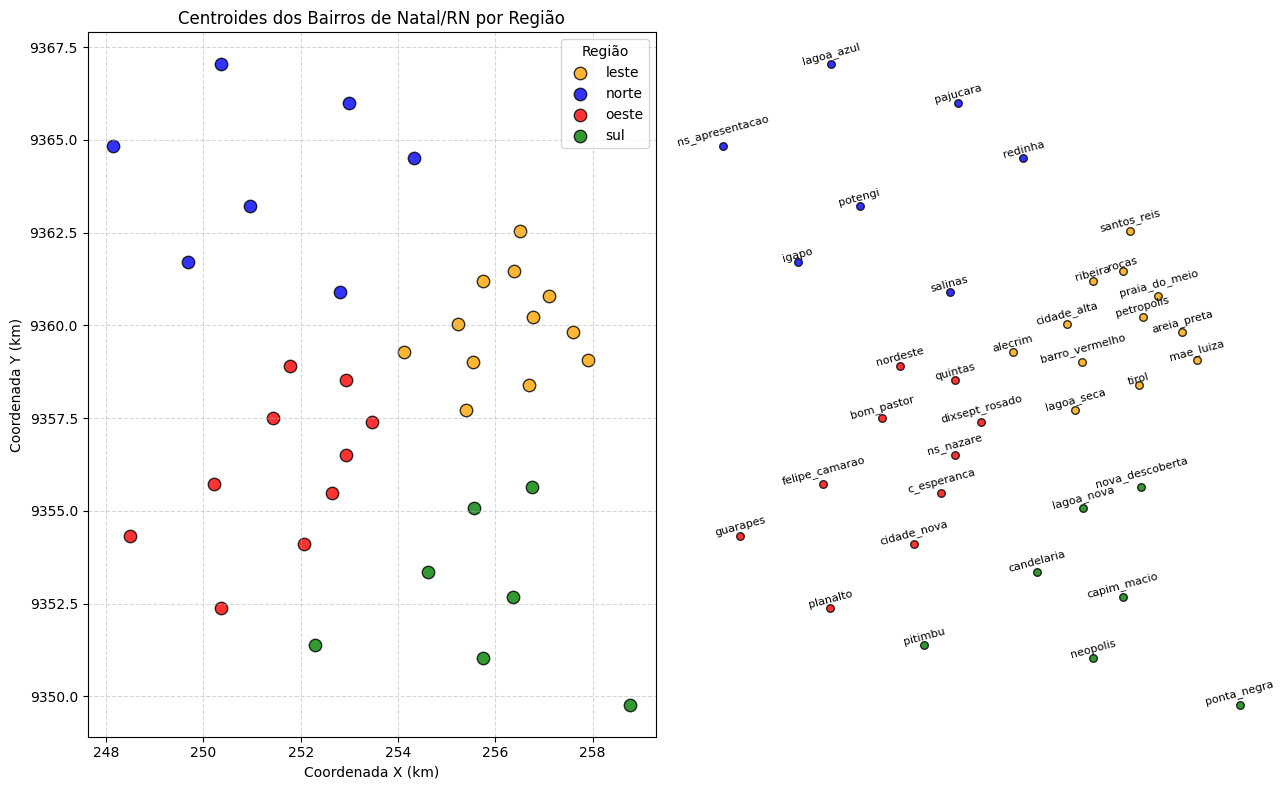

In [3]:
# === Visualização espacial dos bairros de Natal/RN por região ===

# Criação da figura com dois subplots lado a lado
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13, 8))

# Dicionário com cores atribuídas para cada região
cores_regiao = {
    'norte': 'blue',
    'sul': 'green',
    'leste': 'orange',
    'oeste': 'red'
}

# === Gráfico 1: Visualização dos centróides coloridos por região ===
ax = ax1
for regiao, grupo in df_natal.groupby('regiao'):
    ax.scatter(
        grupo['x'] / 1e3,        # Coordenada X convertida para km
        grupo['y'] / 1e3,        # Coordenada Y convertida para km
        label=regiao,
        color=cores_regiao.get(regiao, 'gray'),
        alpha=0.8,
        edgecolors='k',
        s=80                     # Tamanho dos pontos
    )

# Configurações do primeiro gráfico
ax.set_title('Centroides dos Bairros de Natal/RN por Região')
ax.set_xlabel('Coordenada X (km)')
ax.set_ylabel('Coordenada Y (km)')
ax.legend(title='Região')
ax.grid(True, linestyle='--', alpha=0.5)

# === Gráfico 2: Inclusão dos nomes dos bairros ===
ax = ax2
for regiao, grupo in df_natal.groupby('regiao'):
    ax.scatter(
        grupo['x'] / 1e3,
        grupo['y'] / 1e3,
        label=regiao,
        color=cores_regiao.get(regiao, 'gray'),
        alpha=0.8,
        edgecolors='k',
        s=30
    )

# Adiciona o nome de cada bairro na sua posição espacial
for regiao, grupo in df_natal.groupby('regiao'):
    for _, row in grupo.iterrows():
        ax.text(
            row['x'] / 1e3,
            row['y'] / 1e3,
            row['bairro'],
            fontsize=8,
            alpha=1,
            rotation=15,
            ha='center'  # Alinhamento horizontal central
        )

# Remove as bordas do segundo gráfico (estilo limpo)
ax.axis('off')

# === Salvamento do gráfico final ===
save_path = '../Results/'

# Cria o diretório se ele não existir
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Define o nome do arquivo e salva em PDF
plt.tight_layout()
FigName = 'Loc_Bairros.pdf'
plt.savefig(os.path.join(save_path, FigName))
plt.show()


### 🧩 Explicação Técnica da Visualização

Nesta célula, foram utilizados recursos avançados de visualização espacial com `matplotlib` e manipulação de dados com `pandas`. Abaixo explicamos os principais pontos:

---

#### 📌 `df_natal.groupby('regiao')`

Esse comando agrupa o DataFrame `df_natal` com base nos valores únicos da coluna `'regiao'`, criando um objeto `GroupBy`. Ele permite aplicar operações **separadamente por grupo**, como plotagens ou estatísticas.

> Quando usado dentro de um loop:
```python
for regiao, grupo in df_natal.groupby('regiao'):
    ...
```
- `regiao`: contém o nome do grupo (ex: `'norte'`, `'sul'`, etc.).
- `grupo`: é um DataFrame contendo **apenas os bairros daquela região**.

Isso permite criar visualizações personalizadas por grupo, como cores diferentes por região.

---

#### 🎨 `color = cores_regiao.get(regiao, 'gray')`

Neste trecho, usa-se um dicionário (`cores_regiao`) para associar uma cor a cada região:

```python
cores_regiao = {'norte': 'blue', 'sul': 'green', 'leste': 'orange', 'oeste': 'red'}
```

O método `.get()` busca a cor da região atual:
- Se a chave `regiao` existir no dicionário, retorna a cor correspondente.
- Se não existir, retorna `'gray'` (cor padrão).

Essa abordagem evita erros caso uma nova região apareça ou esteja mal escrita.

---

#### 🏷️ `ax.text(x, y, texto, ...)`

Este comando adiciona um **texto posicionado em coordenadas específicas** no gráfico:

```python
ax.text(row['x']/1e3, row['y']/1e3, row['bairro'], fontsize=8, ...)
```

No contexto:
- `x` e `y`: são coordenadas espaciais (em km) do bairro.
- `texto`: é o nome do bairro.
- Parâmetros adicionais como `fontsize`, `rotation` e `alpha` controlam o estilo visual.

Usado aqui para **rotular os bairros diretamente no mapa**.

---

#### 💾 `# === Salvamento do gráfico final ===`

Essa seção verifica se o diretório de salvamento (`../Results/`) existe, e se não existir, ele é criado com `os.makedirs()`.  
O gráfico gerado com `matplotlib` é então salvo em PDF com:

```python
plt.savefig(os.path.join(save_path, FigName))
```

Isso garante que os resultados gráficos possam ser reutilizados posteriormente em relatórios, apresentações ou publicações.

---

#### ⚠️ Outros pontos técnicos relevantes:

- **`edgecolors='k'`**: define contorno preto nos pontos dos gráficos (`'k'` = black), melhorando a visibilidade.
- **`ax.axis('off')`**: oculta as bordas e os eixos do gráfico — útil para visualizações “limpas”, como mapas.
- **`plt.tight_layout()`**: ajusta automaticamente o layout da figura para evitar sobreposição de elementos.

### 📊 Gráficos de Barras dos Indicadores Socioeconômicos

Neste passo, foram gerados três gráficos de barras verticais com os seguintes indicadores:

1. 💰 **Renda mensal por pessoa**  
2. 📈 **Rendimento nominal médio**  
3. 👥 **População total**

Cada bairro é representado no eixo X, com coloração agrupada por região administrativa (Norte, Sul, Leste e Oeste). A escala dos valores foi ajustada para facilitar a leitura:

- Renda e população foram divididas por mil;
- O rendimento nominal foi mantido em sua escala original.

Essas visualizações permitem uma análise comparativa entre os bairros, evidenciando padrões e desigualdades que podem orientar políticas públicas mais direcionadas.

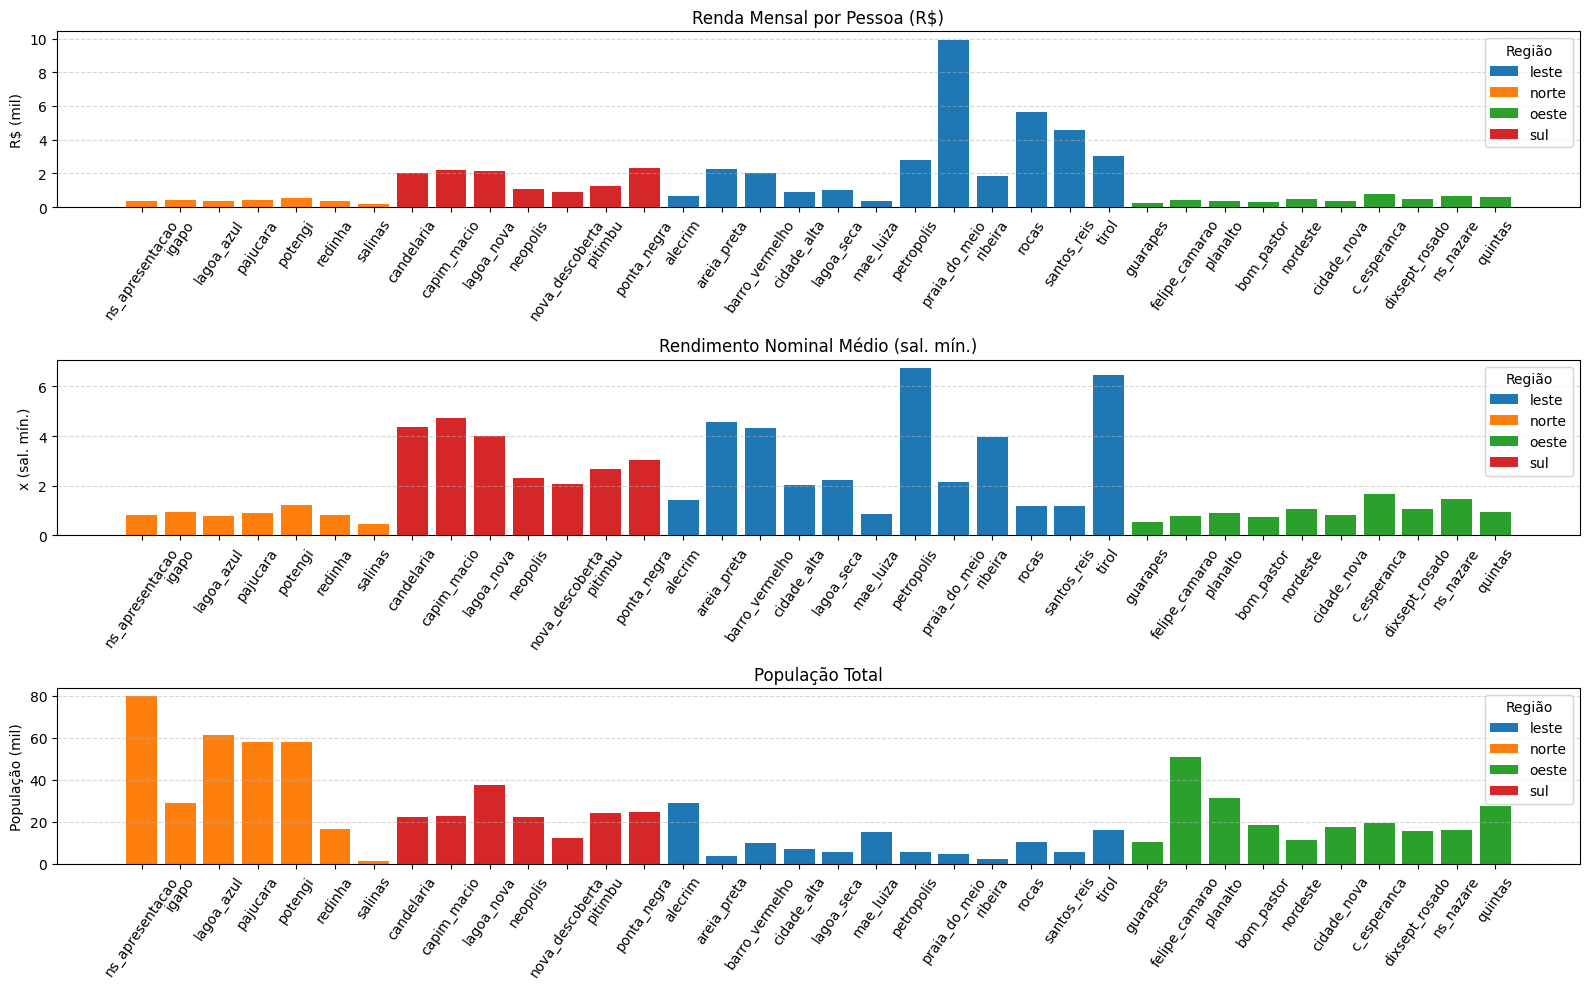

In [4]:
# === Gráficos de barras para indicadores socioeconômicos ===

# Colunas de interesse, títulos e rótulos personalizados
cols = ['renda_mensal_pessoa', 'rendimento_nominal_medio', 'populacao']
titles = [
    'Renda Mensal por Pessoa (R$)',
    'Rendimento Nominal Médio (sal. mín.)',
    'População Total'
]
ylabels = ['R$ (mil)', 'x (sal. mín.)', 'População (mil)']

# Cria uma figura com 3 subplots verticais
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(16, 10))

# Informações auxiliares para eixo X
bairros = df_natal.bairro.values
xtick = range(len(df_natal))
scale = [1e3, 1, 1e3]  # Fatores de escala para melhorar a leitura

# Loop pelos indicadores
for idx, col in enumerate(cols):
    ax = axs[idx]

    # Agrupamento por região e criação das barras
    for regiao, grupo in df_natal.groupby('regiao'):
        x = grupo.index.values
        y = grupo[col] / scale[idx]  # Aplica escala conforme variável
        ax.bar(x, y, label=regiao)

    # Configurações do subplot
    ax.set_title(titles[idx])
    ax.set_ylabel(ylabels[idx])
    ax.set_xticks(xtick)
    ax.set_xticklabels(bairros, rotation=55)
    ax.legend(title='Região')
    ax.grid(True, axis='y', linestyle='--', alpha=0.5)

# Ajuste de layout e salvamento da figura
fig.tight_layout()
FigName = 'Grafico_Barras.pdf'
plt.savefig(os.path.join(save_path, FigName))
plt.show()


## 📈 Gráficos de Dispersão

Nesta etapa, criamos gráficos de dispersão para investigar possíveis relações entre os indicadores socioeconômicos dos bairros de Natal/RN.  

São analisadas combinações entre as seguintes variáveis:

1. 💰 Renda mensal por pessoa  
2. 📈 Rendimento nominal médio (em salários mínimos)  
3. 👥 População total  

O objetivo é verificar a existência de padrões, agrupamentos ou correlações entre os bairros, incluindo possíveis outliers e regiões que se destacam em termos de renda ou densidade populacional.

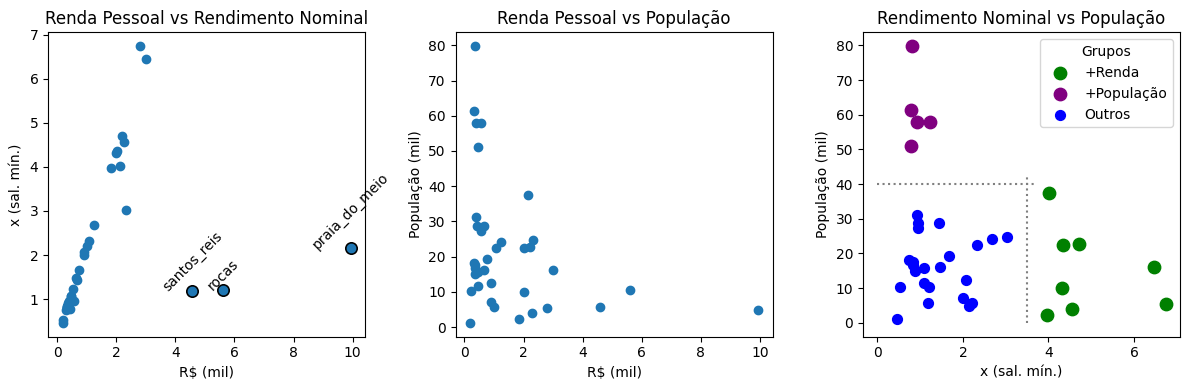

In [5]:
# === Preparação para os gráficos de dispersão ===

cols = ['renda_mensal_pessoa', 'rendimento_nominal_medio', 'populacao']
labels = ['R$ (mil)', 'x (sal. mín.)', 'População (mil)']
titles = ['Renda Pessoal', 'Rendimento Nominal', 'População']
pairs = [[0, 1], [0, 2], [1, 2]]  # Combinações de variáveis a serem plotadas

# Cria um novo DataFrame apenas com as colunas de interesse, e aplica escalas
df = df_natal[cols].copy()
df[['renda_mensal_pessoa', 'populacao']] /= 1e3  # Renda e população em mil unidades

# Define as cores para cada ponto, com base na região
clrs = [cores_regiao.get(regiao, 'gray') for regiao in df_natal['regiao']]

# Cria a figura com 3 subplots em linha
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

for idx, pair in enumerate(pairs):
    ax = axs[idx]
    p1, p2 = pair

    x1 = df.iloc[:, p1]
    x2 = df.iloc[:, p2]

    # Destaca outliers no primeiro gráfico (alta renda)
    if idx == 0:
        idx_outlier = x1 > 4
        for x, y, nome in zip(x1[idx_outlier], x2[idx_outlier], df_natal['bairro'][idx_outlier]):
            ax.text(x, y, nome, fontsize=10, alpha=1, rotation=45, ha='center')
        ax.scatter(x1[idx_outlier], x2[idx_outlier], color='k', s=70)

    # Gráfico padrão com todos os pontos
    ax.scatter(x1, x2)  # Pode incluir: color=clrs para coloração por região

    ax.set_xlabel(labels[p1])
    ax.set_ylabel(labels[p2])
    ax.set_title(f"{titles[p1]} vs {titles[p2]}")

    # Análise de agrupamentos no último gráfico
    if idx == 2:
        idx_rich = x1 > 3.5       # Bairros com alta renda nominal
        idx_pop = x2 > 40         # Bairros com alta população
        idx_others = ~(idx_rich | idx_pop)

        # Linhas de corte para delimitar regiões de interesse
        ax.vlines(3.5, 0, 42, linestyles=':', color='gray')
        ax.hlines(40, 0, 3.7, linestyles=':', color='gray')

        # Plotagem dos grupos destacados
        ax.scatter(x1[idx_rich], x2[idx_rich], color='g', s=80, label="+Renda")
        ax.scatter(x1[idx_pop], x2[idx_pop], color='purple', s=80, label="+População")
        ax.scatter(x1[idx_others], x2[idx_others], color='blue', s=50, label="Outros")

        ax.legend(title='Grupos')

# Ajuste e salvamento da figura
fig.tight_layout()
FigName = 'Pair_Plot.pdf'
plt.savefig(os.path.join(save_path, FigName))
plt.show()


### 📌 Insights dos gráficos de dispersão

Os gráficos de dispersão revelam padrões relevantes entre os principais indicadores socioeconômicos dos bairros de Natal/RN.

No primeiro gráfico — **Renda Pessoal Mensal vs Rendimento Nominal Médio (salários mínimos)** — observa-se uma tendência geral de **correlação positiva e aproximadamente linear**, o que indica que, de forma geral, o aumento da renda mensal por pessoa está associado ao aumento do rendimento nominal médio das pessoas com mais de 10 anos de idade. Essa relação é **monotônica crescente**, sugerindo uma coerência estatística entre os dois indicadores de renda.

Contudo, **três bairros destoam dessa tendência esperada**:

- **Santos Reis**  
- **Rocas**  
- **Praia do Meio**

Estes bairros apresentam valores de **renda pessoal muito elevados** quando comparados ao **rendimento nominal médio relativamente baixo**, o que quebra o padrão observado no restante dos bairros. Dado o contexto socioeconômico desses bairros, tal discrepância pode ser explicada por:

- Potenciais **viéses metodológicos** nos dados do IBGE para estimativa da renda mensal por pessoa;
- Presença de **renda informal elevada** não capturada adequadamente no cálculo do rendimento nominal;
- Ou mesmo **inconsistências nos dados brutos** utilizados na análise.

Diante desse comportamento atípico, opta-se por focar a análise interpretativa no **terceiro gráfico**, que relaciona o **rendimento nominal médio** com a **população total**. Esse gráfico se mostra mais robusto e confiável para fins de agrupamento socioeconômico.

A partir dele, identificamos **três grupos principais**:

1. 🟦 **Outros**: bairros com menor renda e população (Quadrante I);
2. 🟣 **+População**: bairros com população elevada, mas renda baixa (Quadrante II);
3. 🟢 **+Renda**: bairros com **rendimento nominal médio acima de 3,5 salários mínimos** e **população reduzida** (Quadrante IV).

Essa segmentação visual permite identificar padrões de concentração de renda e desigualdade, fornecendo subsídios para políticas públicas mais direcionadas e análises futuras mais refinadas.

## 🗺️ Scatter Plots Espaciais com Indicadores Socioeconômicos

Nesta etapa, representamos a localização geográfica dos bairros de Natal/RN utilizando gráficos de dispersão baseados em coordenadas (x, y). A visualização tem como objetivo destacar padrões espaciais associados a dois indicadores principais:

- 👥 **População total**
- 💰 **Rendimento nominal médio (em salários mínimos)**

Três abordagens complementares são apresentadas:

1. Tamanho dos pontos proporcional à população
2. Tamanho dos pontos proporcional à renda
3. Tamanho proporcional à renda e coloração proporcional à população (mapa temático)

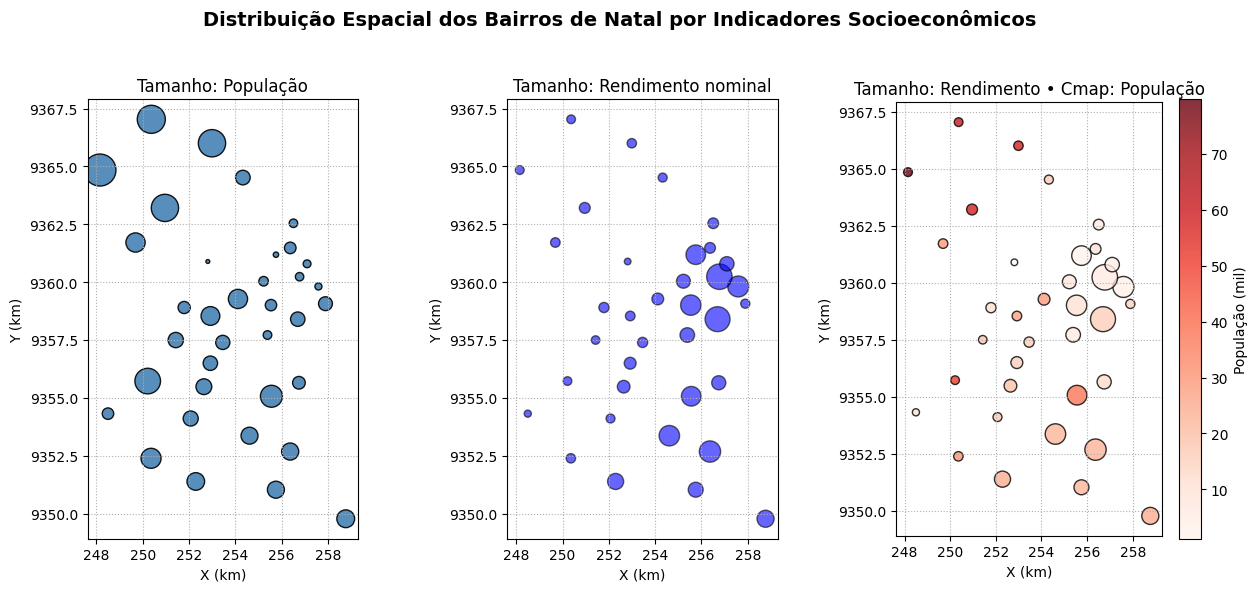

In [6]:
# === Preparação dos dados de coordenadas ===
x = df_natal['x'] / 1e3   # Coordenada X convertida para quilômetros
y = df_natal['y'] / 1e3   # Coordenada Y convertida para quilômetros
pop = df_natal['populacao']
renda = df_natal['rendimento_nominal_medio']

# === Criação dos subplots ===
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(13, 6))
fig.suptitle(
    "Distribuição Espacial dos Bairros de Natal por Indicadores Socioeconômicos",
    fontsize=14, weight='bold'
)

# === Subplot 1: Tamanho proporcional à população ===
axs[0].scatter(
    x, y, s=pop / 150,
    c='steelblue', alpha=0.9,
    edgecolor='k'
)
axs[0].set_title("Tamanho: População")
axs[0].set_xlabel("X (km)")
axs[0].set_ylabel("Y (km)")
axs[0].grid(True, linestyle=':')
axs[0].set_aspect('equal')

# === Subplot 2: Tamanho proporcional à renda nominal ===
axs[1].scatter(
    x, y, s=renda * 50,
    c='blue', alpha=0.6,
    edgecolor='k'
)
axs[1].set_title("Tamanho: Rendimento nominal")
axs[1].set_xlabel("X (km)")
axs[1].set_ylabel("Y (km)")
axs[1].grid(True, linestyle=':')
axs[1].set_aspect('equal')

# === Subplot 3: Tamanho por renda + cor por população ===
sc = axs[2].scatter(
    x, y,
    s=renda * 50,
    c=pop / 1e3,
    cmap='Reds',
    alpha=0.8,
    edgecolor='k'
)
axs[2].set_title("Tamanho: Rendimento • Cmap: População")
axs[2].set_xlabel("X (km)")
axs[2].set_ylabel("Y (km)")
axs[2].grid(True, linestyle=':')
axs[2].set_aspect('equal')

# Adiciona barra de cores (legenda da população)
cbar = fig.colorbar(sc, ax=axs[2])
cbar.set_label("População (mil)")

# Ajusta o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Salva o gráfico em PDF
FigName = 'Pair_Plot_01.pdf'
plt.savefig(os.path.join(save_path, FigName))
plt.show()

### 📌 Insights dos Scatter Plots Espaciais com Indicadores Socioeconômicos

A imagem acima ilustra, de forma clara, as diferenças espaciais nos indicadores socioeconômicos dos bairros de Natal/RN, especificamente em relação à **população total** e ao **rendimento nominal médio**.

Os gráficos revelam um padrão geográfico bem definido:

- 🟥 **Zonas Norte e Oeste**: concentram bairros com maior população e menor renda média.
- 🟦 **Zonas Leste e Sul**: apresentam, em geral, menor população e maior rendimento nominal.

Essas tendências ficam especialmente evidentes no **gráfico central** da figura, onde:

> 🔵 O **tamanho dos círculos representa o rendimento nominal médio** de cada bairro.  
> As áreas mais à direita (Leste e Sul da cidade) apresentam pontos maiores, indicando maior renda média.

Essa análise será aprofundada a seguir, com foco específico na **distribuição espacial do rendimento nominal**, a fim de mostrar possíveis implicações sociais e econômicas desses contrastes.

## 📍 Aprofundando a Análise Espacial do Rendimento Nominal

A seguir, exploramos com mais detalhes a distribuição do **rendimento nominal médio** entre os bairros de Natal/RN, por meio de duas visualizações complementares:

1. 📊 **Gráfico de barras horizontais**: mostra o valor médio de rendimento por bairro, agrupado por região;
2. 🗺️ **Gráfico espacial (scatter)**: destaca geograficamente os bairros com rendimento acima e abaixo de um limiar (neste caso, 2 salários mínimos).

Essa abordagem facilita a identificação de bairros que se destacam em termos de renda e como eles se distribuem no espaço urbano.

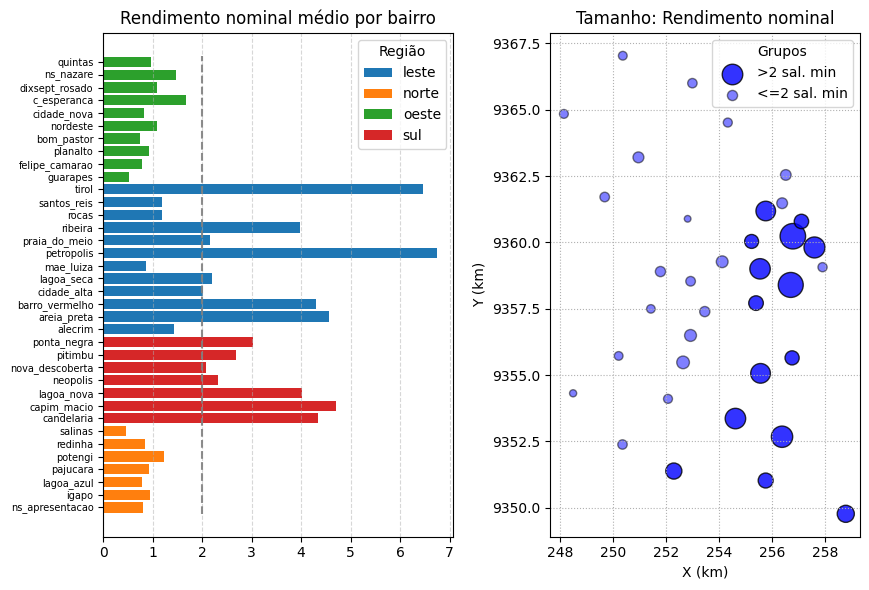

In [7]:
# === Visualização detalhada do rendimento nominal médio ===

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 6))

# === Subplot 1: Barras horizontais ===
ax1.set_title("Rendimento nominal médio por bairro")

# Loop por região para plotar barras com cores diferentes
for regiao, grupo in df_natal.groupby('regiao'):
    # Usa a posição no DataFrame como Y (index já está na ordem desejada)
    y_pos = grupo.index
    ax1.barh(
        y=y_pos,
        width=grupo['rendimento_nominal_medio'],
        label=regiao
    )

# Configurações do eixo Y com nomes dos bairros
ax1.set_yticks(df_natal.index)
ax1.set_yticklabels(df_natal['bairro'], fontsize=7)

# Linha de referência para valor-limite (ex: 2 salários mínimos)
threshold = 2
ax1.vlines(threshold, -0.5, len(df_natal) - 0.5, linestyle='--', color='gray', alpha=0.9)

ax1.legend(title='Região')
ax1.grid(True, axis='x', linestyle='--', alpha=0.5)

# === Subplot 2: Scatter geográfico ===

# Coordenadas em km
x_coor = df_natal['x'] / 1e3
y_coor = df_natal['y'] / 1e3
renda = df_natal['rendimento_nominal_medio']

# Criação de grupos por limiar de renda
idx_melhor_renda = renda > threshold

# Plotagem dos bairros acima do limiar
ax2.scatter(
    x_coor[idx_melhor_renda],
    y_coor[idx_melhor_renda],
    s=renda[idx_melhor_renda] * 50,
    edgecolor='k',
    alpha=0.8,
    color='blue',
    label=f">{threshold} sal. min"
)

# Plotagem dos bairros abaixo do limiar
ax2.scatter(
    x_coor[~idx_melhor_renda],
    y_coor[~idx_melhor_renda],
    s=renda[~idx_melhor_renda] * 50,
    edgecolor='k',
    alpha=0.5,
    color='blue',
    label=f"<={threshold} sal. min"
)

# Configurações do gráfico geográfico
ax2.set_title("Tamanho: Rendimento nominal")
ax2.set_xlabel("X (km)")
ax2.set_ylabel("Y (km)")
ax2.grid(True, linestyle=':')
ax2.set_aspect('equal')
ax2.legend(title='Grupos')

# Ajustes finais e salvamento
plt.tight_layout()
FigName = 'Barra-Pair_Plot.pdf'
plt.savefig(os.path.join(save_path, FigName))
plt.show()


## 🎯 Objetivo: Construir e determinar equações de retas baseadas em pontos de `df_natal`

---

## 🛠️ Tarefas propostas:

### 1. Obter as coordenadas dos pontos $P_1$, $P_2$ e $P_3$ a partir do `df_natal`
> Usar os nomes dos bairros `"cidade_alta"` ($P_1$), `"pitimbu"` ($P_2$) e `"alecrim"` ($P_3$) para extrair suas coordenadas $x$ e $y$.

---

### 2. Criar uma função que, usando as coordenadas de $P_1$ e $P_2$, retorne os parâmetros da reta $r_1$:

- A equação da reta terá a forma:
  \begin{equation*}
  y = mx + n
  \end{equation*}

- Os coeficientes são calculados da seguinte forma:

  - Inclinação (coeficiente angular):
    \begin{equation*}
    m = \frac{y_2 - y_1}{x_2 - x_1}
    \end{equation*}

  - Intercepto (coeficiente linear), usando qualquer um dos dois pontos, por exemplo $P_1$:
    \begin{equation*}
    n = y_1 - m x_1
    \end{equation*}

- A função deve retornar os valores de $m$ e $n$.

---

### 3. Usar o valor de $m$ obtido na etapa 2, e o ponto $P_3$, para calcular a equação da reta $r_2$ que passa por $P_3$:

- Como $r_2$ é **paralela** a $r_1$, ela terá a **mesma inclinação** $m$.

- O novo intercepto $n_2$ é calculado com:
  \begin{equation*}
  n_2 = y_3 - m x_3
  \end{equation*}

---

### 4. Determinar a equação da reta $r_m$, que é:

- **Paralela** a $r_1$ e $r_2$
- **Equidistante** entre $r_1$ e $r_2$

> A equação de $r_m$ é dada por:
\begin{equation*}
n_m = \frac{n_1 + n_2}{2}
\end{equation*}
> mantendo o mesmo coeficiente angular $m$.

---

Esse processo permite construir uma **reta média** entre duas paralelas, útil em análises espaciais, visualização de padrões e separação geométrica em mapas urbanos.

> 🔎 *Observação:* Um procedimento matemático semelhante — embora mais refinado — é utilizado em algoritmos fundamentais da Ciência de Dados, como as **Máquinas de Vetores de Suporte** (*Support Vector Machines* – SVM). Esses algoritmos buscam encontrar **hiperplanos de separação ótimos** entre classes, baseando-se em conceitos de geometria e distância, tal como o apresentado neste exercício.


In [8]:
# === Funções matemáticas auxiliares para cálculo de retas ===

def calcular_intercepto(ponto, m):
    """
    Calcula o coeficiente linear (n) da reta a partir de um ponto (x, y) e da inclinação (m).
    
    Parâmetros:
        ponto: tupla ou array-like com coordenadas (x, y)
        m: coeficiente angular da reta (inclinação)

    Retorna:
        n: coeficiente linear (intercepto com o eixo y)
    """
    x, y = ponto
    n = y - m * x
    return n


def calcular_reta(ponto1, ponto2):
    """
    Calcula os coeficientes (m, n) da reta que passa por dois pontos.

    Parâmetros:
        ponto1: tupla (x1, y1)
        ponto2: tupla (x2, y2)

    Retorna:
        m: coeficiente angular da reta
        n: coeficiente linear (intercepto)
    
    Obs: A função usa o primeiro ponto como base para o cálculo de n.
    """
    x1, y1 = ponto1
    x2, y2 = ponto2

    # Calcula a inclinação da reta
    m = (y2 - y1) / (x2 - x1)

    # Calcula o intercepto com base no primeiro ponto
    n = calcular_intercepto(ponto1, m)
    
    return m, n


In [9]:
# Passo 1: Obter as coordenadas dos pontos P1, P2, P3
# Bairros de interesse: cidade_alta (P1), pitimbu (P2), alecrim (P3)
# Considera-se que os nomes já estão normalizados (sem acentos ou espaços)

pontos_referencia = ['cidade_alta', 'pitimbu', 'alecrim']

# Índices booleanos para localizar os bairros no DataFrame
idx_1 = df_natal['bairro'] == pontos_referencia[0]  # cidade_alta
idx_2 = df_natal['bairro'] == pontos_referencia[1]  # pitimbu
idx_3 = df_natal['bairro'] == pontos_referencia[2]  # alecrim

# Extração das coordenadas (x, y) para cada ponto
P1 = df_natal[idx_1][['x', 'y']].values[0]
P2 = df_natal[idx_2][['x', 'y']].values[0]
P3 = df_natal[idx_3][['x', 'y']].values[0]

# Passo 2: Calcular os coeficientes da reta r1 (passando por P1 e P2)
# Resultado: coeficiente angular (m) e intercepto n_r1
m, n_1 = calcular_reta(P1, P2)

# Passo 3: Calcular a reta r2 que passa por P3 (Alecrim) e é paralela a r1
# Mesma inclinação m, intercepto n_r2 obtido pelo ponto P3
n_2 = calcular_intercepto(P3, m)

# Passo 4: Calcular a reta média rm, paralela e equidistante de r1 e r2
n_m = (n_1 + n_2) / 2

# Reorganizar os dados como lista de dicionários
retas = [
    {'nome': 'reta_r1', 'm': m, 'n': n_1},
    {'nome': 'reta_r2', 'm': m, 'n': n_2},
    {'nome': 'reta_rm', 'm': m, 'n': n_m}
]

# Converter a lista de dicionários em DataFrame
df_retas = pd.DataFrame(retas)
df_retas

,nome,m,n
0,reta_r1,2.951953,8.606630e+06
1,reta_r2,2.951953,8.609137e+06
2,reta_rm,2.951953,8.607884e+06


## 🧭 Visualização da Separação Linear entre Grupos por Rendimento

Nesta etapa, utilizamos a reta média previamente calculada (reta $r_m$) para representar visualmente uma **possível separação linear** entre os bairros com maior e menor rendimento nominal.

A seguir são apresentados dois gráficos:

- **A)** Distribuição espacial dos bairros, onde os pontos são coloridos com base no rendimento médio (acima ou abaixo de 2 salários mínimos).
- **B)** Mesma distribuição, agora destacando as regiões administrativas (Norte, Sul, Leste, Oeste), permitindo observar a distribuição espacial do rendimento em relação às divisões regionais.

A reta traçada em ambos os subgráficos representa a equação:
\begin{equation}
y = m x + n_m
\end{equation}
onde $n_m$ é o intercepto da **reta média equidistante** entre os dois grupos identificados anteriormente.


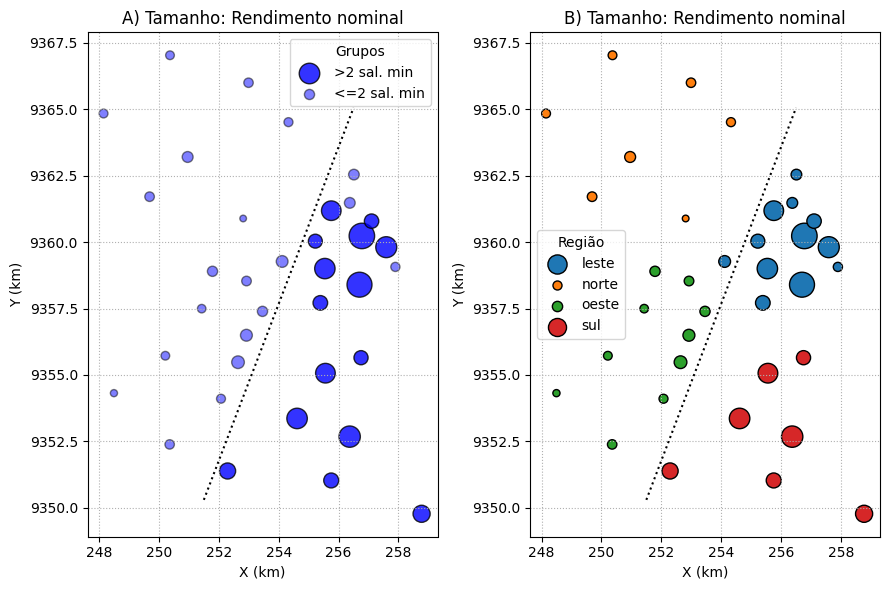

In [10]:
# === Plotando a separação linear com base na reta média ===

# Gera pontos extremos ao longo do eixo x para desenhar a reta
x_vec = np.array([251.5, 256.5]) * 1e3  # em metros
y_vec = m * x_vec + n_m                # equação da reta: y = m*x + n_m

# Cria figura com dois subplots lado a lado
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 6))

# --- Subplot A: Grupos por rendimento (acima ou abaixo do limiar) ---
x_coor = df_natal['x'] / 1e3  # coordenada X em km
y_coor = df_natal['y'] / 1e3  # coordenada Y em km
renda = df_natal['rendimento_nominal_medio']

threshold = 2  # limiar em salários mínimos
idx_melhor_renda = renda > threshold

ax = ax1
# Bairros acima do limiar de renda
ax.scatter(
    x_coor[idx_melhor_renda],
    y_coor[idx_melhor_renda],
    s=renda[idx_melhor_renda] * 50,
    edgecolor='k',
    alpha=0.8,
    color='blue',
    label=f">{threshold} sal. min"
)

# Bairros abaixo do limiar
ax.scatter(
    x_coor[~idx_melhor_renda],
    y_coor[~idx_melhor_renda],
    s=renda[~idx_melhor_renda] * 50,
    edgecolor='k',
    alpha=0.5,
    color='blue',
    label=f"<={threshold} sal. min"
)

# Adiciona reta de separação
ax.plot(x_vec / 1e3, y_vec / 1e3, linestyle=':', color='black')
ax.set_title("A) Tamanho: Rendimento nominal")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.grid(True, linestyle=':')
ax.legend(title='Grupos')

# --- Subplot B: Agrupamento por região administrativa ---
ax = ax2
for regiao, grupo in df_natal.groupby('regiao'):
    idx_reg = grupo.index.values
    x_coor_reg = grupo['x'] / 1e3
    y_coor_reg = grupo['y'] / 1e3

    ax.scatter(
        x_coor_reg,
        y_coor_reg,
        s=renda[idx_reg] * 50,
        edgecolor='k',
        label=regiao
    )

# Adiciona mesma reta de separação
ax.plot(x_vec / 1e3, y_vec / 1e3, linestyle=':', color='black')
ax.set_title("B) Tamanho: Rendimento nominal")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.grid(True, linestyle=':')
ax.legend(title='Região')

# Layout e exibição
plt.tight_layout()
FigName = 'Pair_Plot_02.pdf'
# plt.savefig(os.path.join(save_path, FigName))  # Descomente para salvar
plt.show()


## 🧭 Análise Espacial por Região: Médias dos Indicadores Socioeconômicos

Para finalizar, agregamos os dados dos bairros por **região administrativa** (Norte, Sul, Leste e Oeste) e calculamos a **média** de cada variável numérica para representar cada região com um ponto médio no espaço geográfico.

A seguir, são apresentados três gráficos de dispersão baseados nas **coordenadas médias** de cada região:

1. **Tamanho proporcional à população média da região**  
2. **Tamanho proporcional ao rendimento nominal médio da região**  
3. **Tamanho proporcional à renda e coloração proporcional à população**

Essas visualizações facilitam a comparação **inter-regiões**, destacando padrões agregados que não são perceptíveis apenas em nível de bairro.


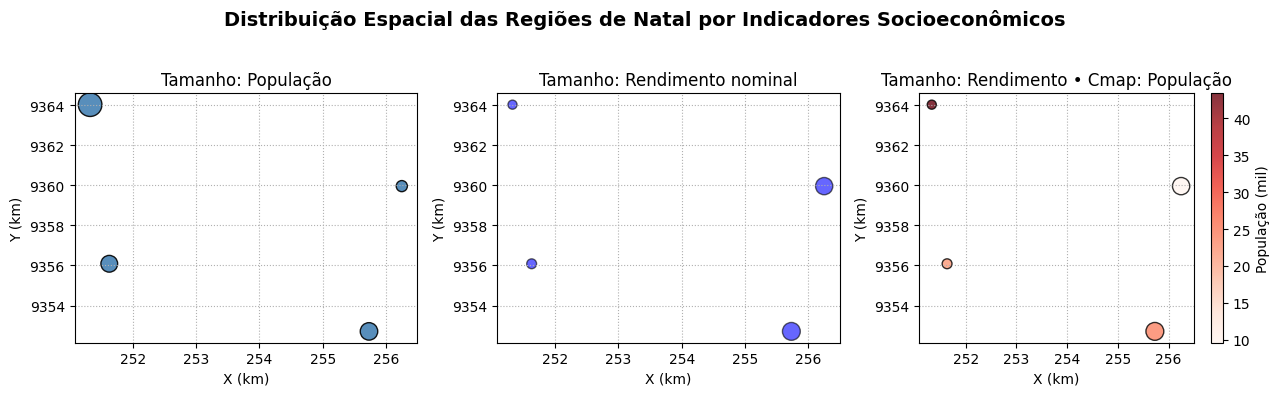

In [11]:
# === Agrupar por 'regiao' e calcular a média de cada coluna numérica ===
df_regiao_medias = df_natal.groupby('regiao').mean(numeric_only=True).reset_index()

# === Preparação dos dados ===
x = df_regiao_medias['x'] / 1e3   # Coordenadas X em km
y = df_regiao_medias['y'] / 1e3   # Coordenadas Y em km
pop_reg_med = df_regiao_medias['populacao']  # População média por região
renda_reg_med = df_regiao_medias['rendimento_nominal_medio']  # Renda média

# === Criação de subplots lado a lado ===
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(13, 4))
fig.suptitle(
    "Distribuição Espacial das Regiões de Natal por Indicadores Socioeconômicos",
    fontsize=14, weight='bold'
)

# --- Subplot 1: Tamanho proporcional à população ---
axs[0].scatter(
    x, y,
    s=pop_reg_med / 150,
    c='steelblue',
    alpha=0.9,
    edgecolor='k'
)
axs[0].set_title("Tamanho: População")
axs[0].set_xlabel("X (km)")
axs[0].set_ylabel("Y (km)")
axs[0].grid(True, linestyle=':')

# --- Subplot 2: Tamanho proporcional à renda nominal média ---
axs[1].scatter(
    x, y,
    s=renda_reg_med * 50,
    c='blue',
    alpha=0.6,
    edgecolor='k'
)
axs[1].set_title("Tamanho: Rendimento nominal")
axs[1].set_xlabel("X (km)")
axs[1].set_ylabel("Y (km)")
axs[1].grid(True, linestyle=':')

# --- Subplot 3: Tamanho pela renda e cor pela população ---
sc = axs[2].scatter(
    x, y,
    c=pop_reg_med / 1e3,           # Cor proporcional à população (em mil)
    s=renda_reg_med * 50,          # Tamanho proporcional à renda
    cmap='Reds',
    alpha=0.8,
    edgecolor='k'
)
axs[2].set_title("Tamanho: Rendimento • Cmap: População")
axs[2].set_xlabel("X (km)")
axs[2].set_ylabel("Y (km)")
axs[2].grid(True, linestyle=':')

# Barra de cores associada à população (em mil)
cbar = fig.colorbar(sc, ax=axs[2])
cbar.set_label("População (mil)")

# Ajuste de layout para evitar sobreposição com o título
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
